In [1]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
from nltk import word_tokenize, sent_tokenize

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/cdot/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
txt = "Klingon is the most developed fictional language. It was created in 1979 as the language spoken by the warrior race Klingon in the TV show Star Trek. The linguist Mark Okrand has created the language to be fully functional, to the point where fans use it to write songs and say their wedding vows."

In [5]:
txt

'Klingon is the most developed fictional language. It was created in 1979 as the language spoken by the warrior race Klingon in the TV show Star Trek. The linguist Mark Okrand has created the language to be fully functional, to the point where fans use it to write songs and say their wedding vows.'

In [6]:
# The give text is divided into sentences
sent_tokens = sent_tokenize(txt)
print(len(sent_tokens))

3


In [7]:
doc_word_tokens = word_tokenize(txt)
sent_word_tokens = [word_tokenize(t) for t in sent_tokens]
print(len(doc_word_tokens), len(sent_word_tokens))

58 3


In [8]:
print(sent_word_tokens)

[['Klingon', 'is', 'the', 'most', 'developed', 'fictional', 'language', '.'], ['It', 'was', 'created', 'in', '1979', 'as', 'the', 'language', 'spoken', 'by', 'the', 'warrior', 'race', 'Klingon', 'in', 'the', 'TV', 'show', 'Star', 'Trek', '.'], ['The', 'linguist', 'Mark', 'Okrand', 'has', 'created', 'the', 'language', 'to', 'be', 'fully', 'functional', ',', 'to', 'the', 'point', 'where', 'fans', 'use', 'it', 'to', 'write', 'songs', 'and', 'say', 'their', 'wedding', 'vows', '.']]


### To find frequency distribution

In [9]:
from nltk.probability import FreqDist

In [10]:
fdist = FreqDist(doc_word_tokens)
fdist

FreqDist({'the': 6, 'language': 3, '.': 3, 'to': 3, 'Klingon': 2, 'created': 2, 'in': 2, 'is': 1, 'most': 1, 'developed': 1, ...})

In [11]:
fdist.most_common(10)

[('the', 6),
 ('language', 3),
 ('.', 3),
 ('to', 3),
 ('Klingon', 2),
 ('created', 2),
 ('in', 2),
 ('is', 1),
 ('most', 1),
 ('developed', 1)]

### create plot for frequency

In [12]:
import matplotlib.pyplot as plt

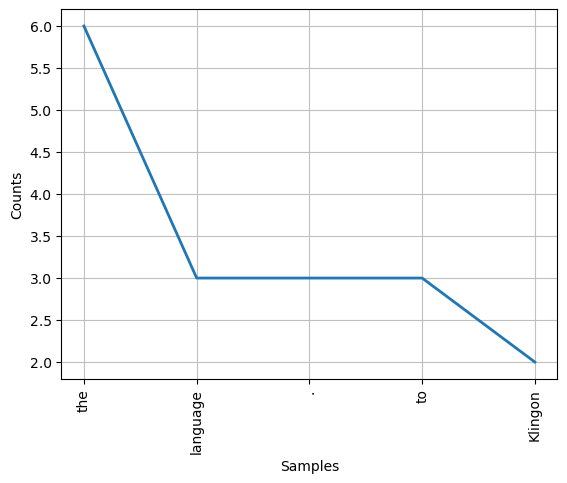

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [13]:
fdist.plot(5)

### Remove the Punctuation marks in the text

In [48]:
# We need to create Empty list to store alphanum values along with all lower case
no_punch_words = []
for w in doc_word_tokens:
    if w.isalpha():
        no_punch_words.append(w.lower())
        
print(len(no_punch_words),'\n',no_punch_words)

53 
 ['klingon', 'is', 'the', 'most', 'developed', 'fictional', 'language', 'it', 'was', 'created', 'in', 'as', 'the', 'language', 'spoken', 'by', 'the', 'warrior', 'race', 'klingon', 'in', 'the', 'tv', 'show', 'star', 'trek', 'the', 'linguist', 'mark', 'okrand', 'has', 'created', 'the', 'language', 'to', 'be', 'fully', 'functional', 'to', 'the', 'point', 'where', 'fans', 'use', 'it', 'to', 'write', 'songs', 'and', 'say', 'their', 'wedding', 'vows']


In [49]:
fpdist = FreqDist(no_punch_words)
fpdist.most_common(5)

[('the', 7), ('language', 3), ('to', 3), ('klingon', 2), ('it', 2)]

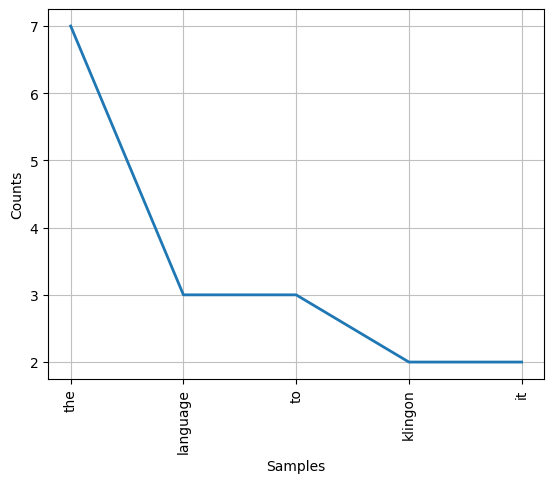

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [50]:
fpdist.plot(5)

### List of stop words in the text

In [51]:
from nltk.corpus import stopwords

In [52]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/cdot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
sw = stopwords.words('english')

# Removing the stopwords
clean_words = []
for w in no_punch_words:
    if w not in sw:
        clean_words.append(w)

print(len(clean_words))
print(clean_words)

29
['klingon', 'developed', 'fictional', 'language', 'created', 'language', 'spoken', 'warrior', 'race', 'klingon', 'tv', 'show', 'star', 'trek', 'linguist', 'mark', 'okrand', 'created', 'language', 'fully', 'functional', 'point', 'fans', 'use', 'write', 'songs', 'say', 'wedding', 'vows']


### Find frequency distribution

In [54]:
fcwords = FreqDist(clean_words)
fcwords.most_common(5)

[('language', 3),
 ('klingon', 2),
 ('created', 2),
 ('developed', 1),
 ('fictional', 1)]

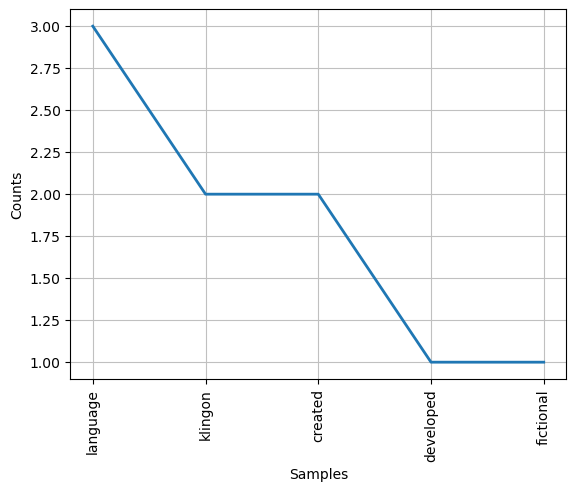

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [55]:
fcwords.plot(5)

### Word Cloud

*Properties*:

font_path: It specifies the path for the fonts we want to use.

width: It specifies the width of the canvas.

height: It specifies the height of the canvas.

min_font_size: It specifies the smallest font size to use.

max_font_size: It specifies the largest font size to use.

font_step: It specifies the step size for the font.

max_words: It specifies the maximum number of words on the word cloud.

stopwords: Our program will eliminate these words.

background_color: It specifies the background color for canvas.

normalize_plurals : It removes the trailing “s” from words.

In [56]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [79]:
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer

In [81]:
# the porter stemmer is not give the dictionary words and it support only english
ps = PorterStemmer()
# It produces the best output and it has lowest error rate
# and reduced words are not always ral words

# the Snowballstemmer is same like porterstemmer but it supports many languages
sbs = SnowballStemmer('english')

# WordNetLemmatizer will give same as dictionary word
wnl = WordNetLemmatizer()


### Lemmatization

Lemmatization tries to achieve a similar base “stem” for a word. 
#However, what makes it different is that it finds the dictionary word instead of 
#truncating the original word. Stemming does not consider the context of the word. 
#That is why it generates results faster, but it is less accurate than lemmatization.
#If accuracy is not the project’s final goal, then stemming is an appropriate approach. 
#If higher accuracy is crucial and the project is not on a tight deadline, 
#then the best option is amortization (Lemmatization has a lower processing speed, compared to stemming).

In [69]:
word_list = ['studying', 'studies','study','studied']
word_list1 = ['leaving', 'leave', 'history','histories','died','kernal','social','playing','plays']
print(word_list)
print(word_list1)

['studying', 'studies', 'study', 'studied']
['leaving', 'leave', 'history', 'histories', 'died', 'kernal', 'social', 'playing', 'plays']


In [70]:
for w in word_list:
    print(ps.stem(w))

studi
studi
studi
studi


In [71]:
for w in word_list1:
    print(ps.stem(w))

leav
leav
histori
histori
die
kernal
social
play
play


In [72]:
for w in word_list:
    print(sbs.stem(w))

studi
studi
studi
studi


In [73]:
for w in word_list1:
    print(sbs.stem(w))

leav
leav
histori
histori
die
kernal
social
play
play


In [75]:
# It will supported by different languages
sbs.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [84]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/cdot/nltk_data...


True

the default value of lemmatization is Noun(n)

In [85]:
for w in word_list:
    print(wnl.lemmatize(w))

studying
study
study
studied


In [89]:
for w in word_list1:
    print(wnl.lemmatize(w, pos = 'v'))

leave
leave
history
histories
die
kernal
social
play
play
